# Introduction
Decision trees are a powerful, and popular supervised machine learning technique used for both classification, and regression tasks. They are widely used for interpretability, ease of implementation, and ability to handle various data types.

A decision tree resembeles a flowchart like structure with 3 main components,
1. Internal nodes: These represent questions, or test applied to a specific feature of the data.
2. Branches: These represent the outcome of the test at an internal node, leading to different parts of the tree.
3. Leaf nodes: These represent the final decision or prediction made by the tree.

Advantages of decision trees,
- Interpretability: Decision trees are easy to understand and interpret. The branches can easily be followed to understand the logic behind the predictions.
- No feature scaling: Decision trees can handle both numerical and categorical features without the need for explicit feature scaling, which can be a challenge in other algorithms.
- Robust to outliers: Decision trees are relatively robust to outliers in the data compared to some other models.
- Can handle missing values: Techniques like splitting based on the presence or absence of a value can be used to handle missing data.

Disadvantages of decision trees,
- Prone to overfitting: If allowed to grow too deep, decision trees can become overly complex and start fitting the training data too closely, leading to poor performance on unseen data (overfitting). Techniques like pruning or setting a maximum depth can help mitigate this.
- High variance: Decision trees can be sensitive to small changes in the data, leading to potentially high variance in the model's predictions. Techniques like bagging or random forests can help reduce variance.
- Feature importance: While interpretable, understanding the exact contribution of each feature to the final decision can be challenging in complex trees.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20, 5)

# Decision Tree Algorithm
1. Start with the entire dataset at the root node.
2. Choose the best splitting feature: This involves finding the feature that best separates the data into distinct groups based on the target variable (classification), or prediction of continuous value (regression). Techniques like information gain (IG), or gini impurity (GI) are used to evaluate the goodness of the split.
3. Split the data based on the chosen feature: Create branches for each possible outcome of the test at the internal node.
4. Recursively repeat step 2, and 3 for each branch until a stopping criteria is met. This criteria could be, reaching a certain level of purity (meaning all data points in a leaf node belong to the same class in classification or have similar target values in regression), or reaching the maximum depth defined for the tree, or having no more informative features to split on.

# Visualizing Decision Trees
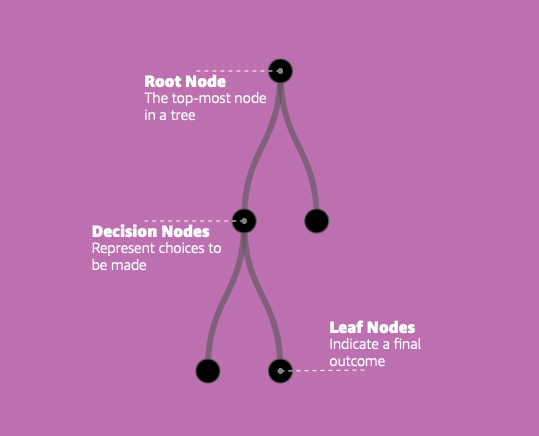

- The first node is called as root node.
- The nodes that are not split further are class as leaf nodes.
- The nodes in between the root node, and the leaf nodes are called as internal nodes, or decision nodes.
- The decision boundaries in a decision tree are axis parallel. Meaning, a node cannot be created that splits the data linearly, or polynomially, or logistically.
- Pure node, or homogenous nodes occur when there is only one class present as a result of a lot of splitting.

# How to decide what feature to split on, and what threshold to split on?
- Say that there are 200 data points, 100 positive and 100 negative. Also, say that there are d features.
- Say that 2 features j and k are selected out of the d features. Also say that 2 thresholds $\tau_j$ and $\tau_k$ are chosen.
- Consider case 1, where the feature j, and the threshold $\tau_j$ is splitting the 200 data points into, 10 positives and 90 negatives if the decision was yes, and 90 positives and 10 negatives if the decision was no.
- Consider case 2, where the feature k, and the threshold $\tau_k$ is splitting the 200 data points into, 60 positives and 40 negatives if the decision was yes, and 40 positives and 60 negatives if the decision was no.
- The better combination of feature, and threshold that should be selected is case 1. Why? Because, this choice is resulting in a purer node, or better segregation.

# How to measure purity (Entropy)?
